importing libraries 

In [22]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle

In [2]:
df = pd.read_csv("./Data/car_price_prediction_.csv")

# Linear Regression Model

In [5]:
X = df.drop(columns=["Car ID", "Price"])
y = df["Price"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Mileage", "Engine Size", "Year"]),
        (
            "cat",
            OneHotEncoder(),
            ["Transmission", "Brand", "Fuel Type", "Condition", "Model"],
        ),
    ]
)

lm_pipeline = Pipeline(
	steps=[
		('preprocessor', preprocessor),
		('regressor', LinearRegression())
	]
)

lm_pipeline.fit(X_train, y_train)

# Make predictions
predictions = lm_pipeline.predict(X_test)

# Print predictions
print(predictions)

[55824.6451251  50892.69279052 53979.573457   53650.02905019
 52089.27725827 51733.75382753 49239.88049599 53813.7786149
 53621.82578354 52667.80880916 55258.06682406 49581.55146841
 54663.68676976 55511.23817674 51755.94605473 49829.64227994
 50384.94847167 59416.16053019 53727.94394516 57764.52641701
 50860.81857637 52685.48949149 48594.84083596 52917.43104476
 52703.30631743 48850.42672463 59743.65258559 53095.72295418
 47734.13765737 54772.23866393 52701.65796901 52470.72059983
 51904.61012505 54622.80901561 46344.81805406 44362.59587973
 50862.97986395 41737.94990633 52702.62975332 52453.22830381
 52436.11902627 53497.38929177 57648.58992068 41983.46961741
 52586.67496069 52969.91172677 49689.40054148 56798.77228779
 52421.62295908 45674.50415232 55385.02732361 51838.0525923
 50405.05584209 50310.42065899 51334.98474623 44361.56767097
 51110.20192687 43234.53706139 50998.86940098 50193.69525825
 57637.92425995 51625.5992983  55839.20861466 44889.28420377
 46112.4457911  53472.0551

In [9]:
model = lm_pipeline.named_steps["regressor"]

coeff = model.coef_
coeff

array([  -39.09488447,  -242.65684335, -1149.8029004 ,  -420.93680877,
         420.93680877,   163.88069887,  1593.96406379, -1112.7470373 ,
       -1124.48086844,   161.23705172,   899.19327137,  -581.04718003,
        2324.96522553,  -975.85033741,  -239.17160331, -1109.94328481,
         115.93747047,  -214.21643912,    98.27896865,  4666.15442566,
         562.56868016, -1122.61988741,   605.46596949,  1772.97866451,
        1042.8971421 , -3653.95977786,  1425.71795677,  -630.96846933,
        2351.56774579, -1851.93277691,  2808.09880525,  -111.10089743,
        1387.46871425,  3429.51486814, -7079.27532599,  8049.54801252,
       -1200.07735098,   125.82271186,  -962.33882955,  2935.78674005,
       -7239.25981325, -4004.34987221,  1402.09162655,  -721.05700976,
        -353.98301038, -1401.72347749, -2233.03556455])

In [12]:
preprocessor = lm_pipeline.named_steps["preprocessor"]

feature_names = preprocessor.transformers_[0][2]  # Numeric
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(
    input_features=[
        "Transmission",
        "Brand",
        "Fuel Type",
        "Condition",
        "Model",
    ]
)

all_feature_names = list(feature_names) + list(cat_feature_names)

coef_df = pd.DataFrame(coeff, columns=["Coef"], index=all_feature_names)

coef_df

,Coef
Mileage,-39.094884
Engine Size,-242.656843
Year,-1149.802900
Transmission_Automatic,-420.936809
Transmission_Manual,420.936809
Brand_Audi,163.880699
Brand_BMW,1593.964064
Brand_Ford,-1112.747037
Brand_Honda,-1124.480868
Brand_Mercedes,161.237052


<Axes: ylabel='Price'>

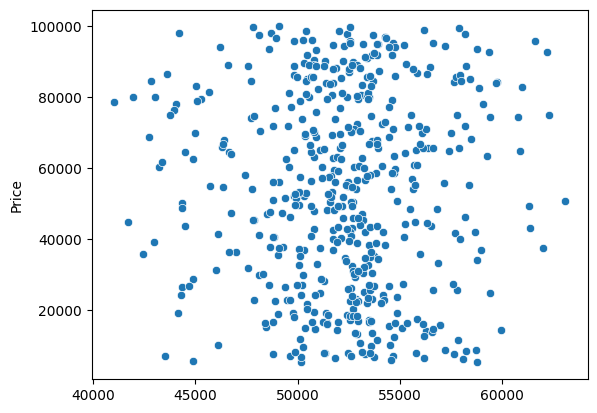

In [14]:
sns.scatterplot(x=predictions, y=y_test)

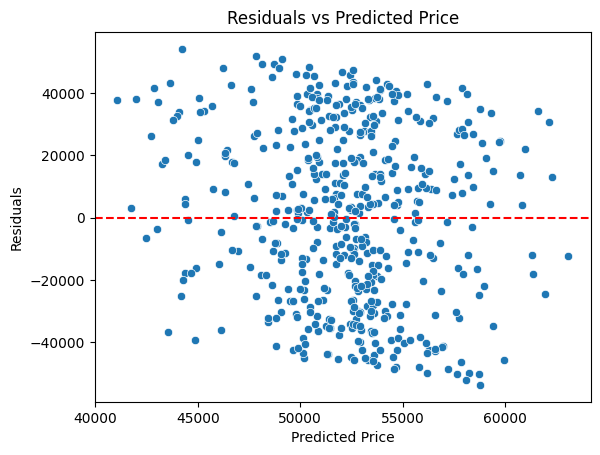

In [17]:
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()

In [37]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 23877.144632323714
Mean Squared Error: 772529508.7626414
RMSE:  27794.415064229026


In [25]:
mean_residual = residuals.mean()
print(f"Mean of residual:", mean_residual)

Mean of residual: 1075.695146367249


# XGBoost Regressor 

In [27]:
import xgboost as xgb


xg_Pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", xgb.XGBRegressor(objective="reg:squarederror")),
    ]
)

xg_Pipeline.fit(X_train, y_train)

xg_Predictions = xg_Pipeline.predict(X_test)

xg_Predictions

array([72444.   , 44987.844, 46875.67 , 43427.6  , 36846.98 , 54174.934,
       66816.16 , 54496.016, 59682.258, 57904.01 , 54999.867, 46880.69 ,
       62970.867, 35943.082, 60207.52 , 44157.74 , 53276.445, 68274.21 ,
       52415.69 , 57243.86 , 47729.227, 47491.246, 51576.19 , 54458.957,
       40259.438, 39071.812, 62002.1  , 56942.68 , 29319.76 , 34257.332,
       34853.56 , 48707.547, 44101.797, 43883.035, 34533.31 , 43238.387,
       52388.688, 16567.54 , 57027.29 , 41357.08 , 48892.996, 22869.166,
       42569.97 , 49564.312, 75772.94 , 40274.27 , 63820.973, 63852.08 ,
       42950.61 , 49034.18 , 36537.266, 49538.88 , 66557.98 , 45216.26 ,
       63421.49 , 50489.176, 49829.695, 49820.984, 48062.406, 47360.273,
       38096.742, 51018.47 , 48156.523, 24845.797, 58529.094, 54966.91 ,
       62215.906, 52258.14 , 66882.88 , 39523.223, 50154.383, 71360.37 ,
       31249.908, 19129.25 , 69172.85 , 43570.945, 63632.777, 38656.613,
       40167.355, 46395.918, 33074.508, 58626.63 , 

In [28]:
print("XGBRegressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, xg_Predictions))
print("Mean Squared Error:", mean_squared_error(y_test, xg_Predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, xg_Predictions)))

XGBRegressor:
Mean Absolute Error: 26327.570186406247
Mean Squared Error: 974557833.0290098
RMSE:  31217.908850994645


# Random Forest Regressor 

In [33]:
from sklearn.ensemble import RandomForestRegressor

random_forest_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ]
)

random_forest_pipeline.fit(X_train,y_train)
random_forest_predictions = random_forest_pipeline.predict(X_test)
random_forest_predictions

array([60837.6321, 47971.8853, 50661.1665, 48358.2279, 48923.8994,
       46400.9955, 51237.3509, 45455.6859, 55778.6674, 53608.5776,
       57951.9172, 36963.0531, 58413.1198, 39128.8896, 46677.0303,
       46536.0999, 51140.1847, 64236.5309, 51298.4866, 60157.2443,
       60998.3204, 39954.4427, 55951.4022, 46403.8398, 44855.1762,
       55296.8643, 56365.2844, 58113.3197, 43126.1562, 55880.1165,
       52157.0448, 44709.7337, 49222.5438, 49216.5717, 40991.1537,
       40790.492 , 49460.0614, 32835.2707, 51087.1255, 38436.3167,
       53253.6393, 49767.0354, 54161.3547, 54274.228 , 51545.5689,
       39165.0024, 51796.3472, 63839.6994, 46018.7155, 55558.518 ,
       43876.6363, 51748.923 , 62842.8568, 55531.0158, 52997.0019,
       34997.5044, 51051.2446, 51410.9046, 53691.3984, 51106.5548,
       45589.5202, 51191.4892, 44083.3333, 34605.4001, 51327.7607,
       51842.113 , 67670.7712, 59699.3126, 50865.7064, 52846.7021,
       54274.742 , 57531.1207, 51476.7241, 40963.0938, 54962.8

In [38]:
print("Random Forest Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, random_forest_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, random_forest_predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, random_forest_predictions)))

Random Forest Regressor:
Mean Absolute Error: 24441.052007399998
Mean Squared Error: 807676693.8835349
RMSE:  28419.653303366227


# Saving the model and preprocessor

In [ ]:
# with open("preprocessor.pkl", "wb") as file:
#     pickle.dump(preprocessor, file)

In [ ]:
# with open("lm.pkl", "wb") as file:
#     pickle.dump(lm_pipeline, file)